<a href="https://colab.research.google.com/github/milicasopalovic/RI_rokovi/blob/main/mobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://gitlab.com/milicasopalovic/ip2-projekat.git

Cloning into 'ip2-projekat'...
remote: Enumerating objects: 3600, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 3600 (delta 15), reused 106 (delta 7), pack-reused 3369 (from 1)
Receiving objects: 100% (3600/3600), 78.39 MiB | 28.34 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array, save_img, image_dataset_from_directory
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from collections import Counter
import cv2
import imghdr
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [3]:
podaci_dir = './ip2-projekat/materijali'

In [4]:
ekstenzije_slika = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for klasa in os.listdir(podaci_dir):
    for slika in os.listdir(os.path.join(podaci_dir, klasa)):
        putanja = os.path.join(podaci_dir, klasa, slika)
        try:
            img = cv2.imread(putanja)
            tip = imghdr.what(putanja)
            if tip not in ekstenzije_slika:
                print('Slika nije u okviru {}'.format(putanja))
                os.remove(putanja)
        except Exception as e:
            print('Issue with image {}'.format(putanja))


In [6]:
podaci = tf.keras.utils.image_dataset_from_directory('./ip2-projekat/materijali')

Found 1866 files belonging to 38 classes.


In [7]:
len(podaci.class_names)


38

In [8]:
imena_klasa = podaci.class_names


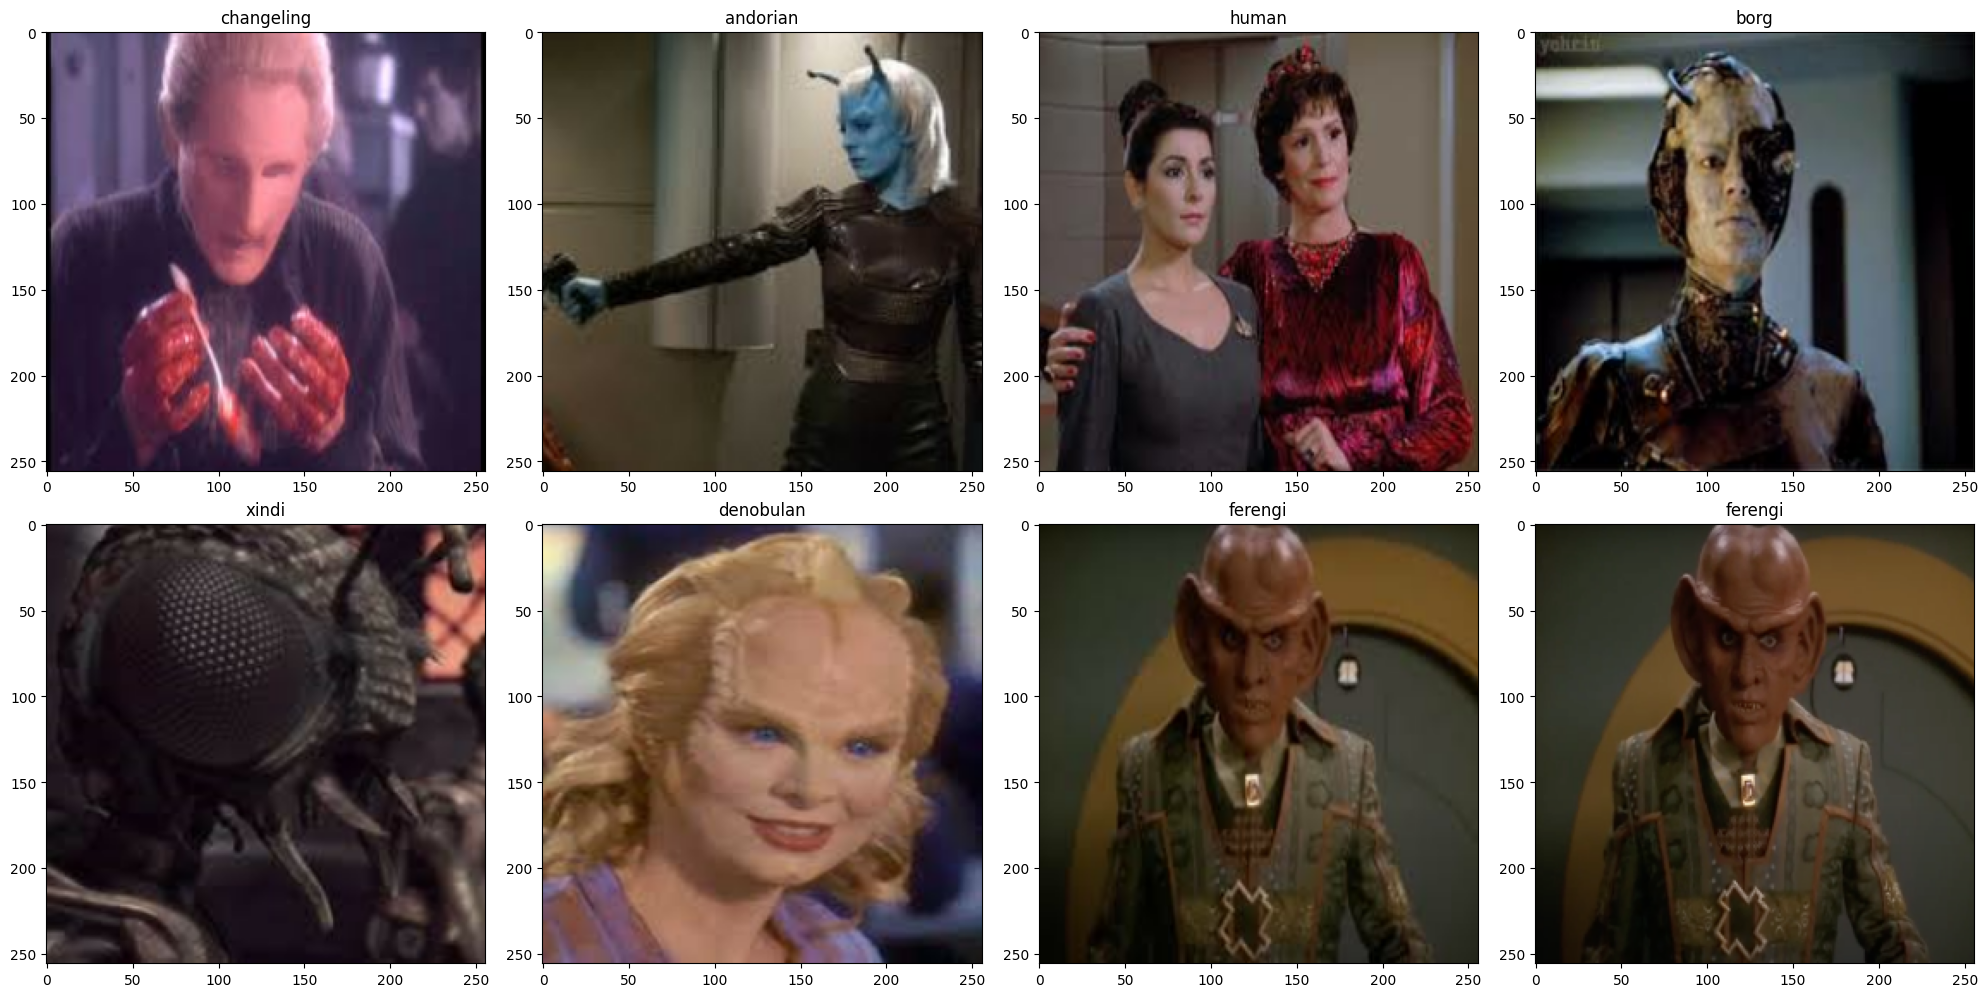

In [9]:
iterator = podaci.as_numpy_iterator()
batch = iterator.next()
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # 2 reda, 4 kolone, prilagođena veličina figure

for idx, img in enumerate(batch[0][:8]):  # Prikazujemo prvih 8 slika
    row, col = divmod(idx, 4)  # Računanje reda i kolone
    ax[row, col].imshow(img.astype(int))  # Prikaz slike na odgovarajućoj poziciji
    ime_klase = imena_klasa[batch[1][idx]]  # Dohvatanje imena klase
    ax[row, col].title.set_text(ime_klase)  # Postavljanje naslova

# Ukloni prazne osi ako imaš manje od 8 slika:
for idx in range(len(batch[0][:8]), 8):
    row, col = divmod(idx, 4)
    fig.delaxes(ax[row, col])  # Uklanjanje neiskorišćenih podgrafikona

plt.tight_layout()  # Automatski prilagođavanje rasporeda
plt.show()

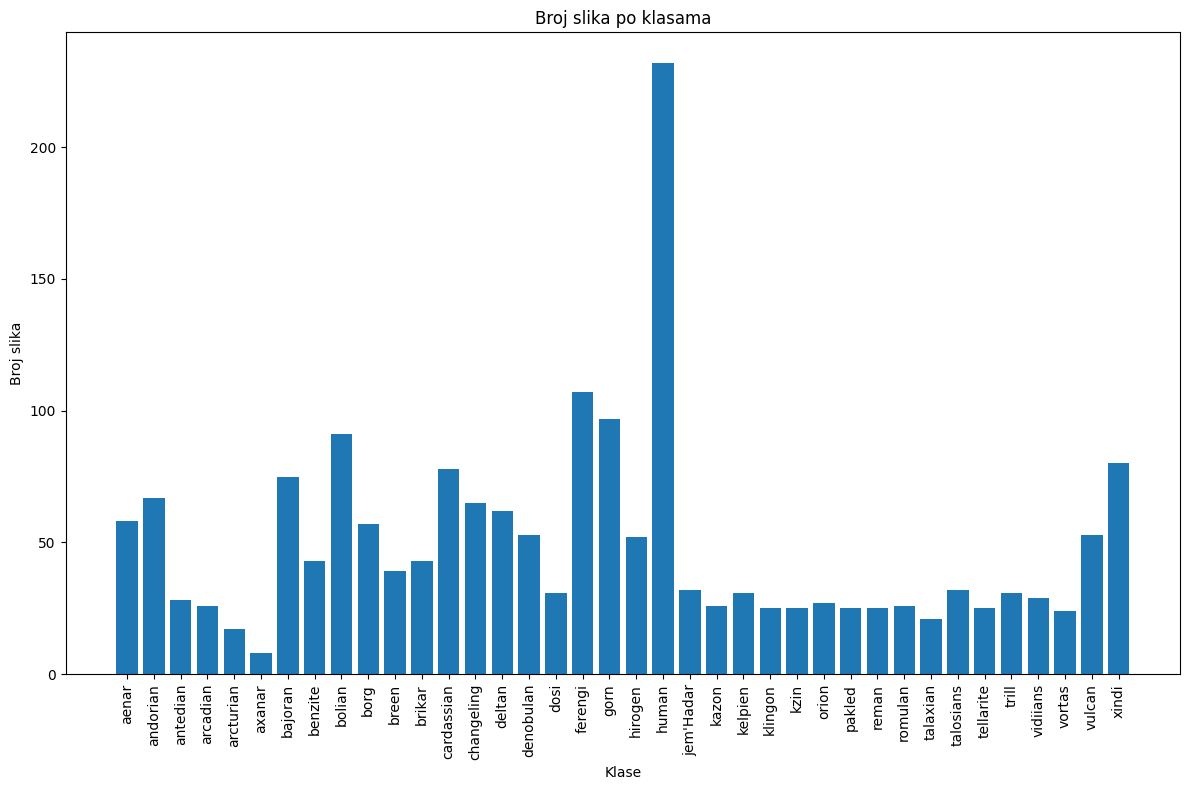

In [10]:
labele = []
for _, labela in podaci:
    labele.extend(labela.numpy())

broj_slika = Counter(labele)

# Pripremi podatke za bar chart
broj_klasa = [broj_slika.get(i, 0) for i in range(len(imena_klasa))]

# Kreiraj bar chart
plt.figure(figsize=(12, 8))
plt.bar(imena_klasa, broj_klasa)
plt.xticks(rotation=90)
plt.title('Broj slika po klasama')
plt.xlabel('Klase')
plt.ylabel('Broj slika')
plt.tight_layout()
plt.show()

In [11]:
import os
import shutil


izvorni_dir = "./ip2-projekat/materijali"
ciljni_dir = "skup_podataka"

# Kreiranje trening i test direktorijuma
trening_dir = os.path.join(ciljni_dir, "trening")
test_dir = os.path.join(ciljni_dir, "test")
os.makedirs(trening_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

klase = os.listdir(izvorni_dir)

for ime_klase in klase:
    putanja = os.path.join(izvorni_dir, ime_klase)

    if not os.path.isdir(putanja):
        continue

    slike = os.listdir(putanja)
    slike = [os.path.join(putanja, img) for img in slike if img.endswith(('.jpg', '.png', '.jpeg'))]  # Filtrirajte slike

    trening_slike, test_slike = train_test_split(slike, test_size=0.3, random_state=42)

    # Kreiranje direktorijuma za trenutnu klasu u train/test
    trening_klase_dir = os.path.join(trening_dir, ime_klase)
    test_klase_dir = os.path.join(test_dir, ime_klase)
    os.makedirs(trening_klase_dir, exist_ok=True)
    os.makedirs(test_klase_dir, exist_ok=True)

    # Premestanje slika u odgovarajuće direktorijume
    for putanja_slike in trening_slike:
        shutil.copy(putanja_slike, os.path.join(trening_klase_dir, os.path.basename(putanja_slike)))
    for putanja_slike in test_slike:
        shutil.copy(putanja_slike, os.path.join(test_klase_dir, os.path.basename(putanja_slike)))

    print(f"Klasa '{ime_klase}' podeljena: {len(trening_slike)} za trening, {len(test_slike)} za test.")

print("Podela završena! Trening i test podaci su organizovani u direktorijumu:", ciljni_dir)

Klasa 'talaxian' podeljena: 14 za trening, 7 za test.
Klasa 'jem'Hadar' podeljena: 22 za trening, 10 za test.
Klasa 'xindi' podeljena: 56 za trening, 24 za test.
Klasa 'deltan' podeljena: 43 za trening, 19 za test.
Klasa 'pakled' podeljena: 17 za trening, 8 za test.
Klasa 'vortas' podeljena: 16 za trening, 8 za test.
Klasa 'antedian' podeljena: 19 za trening, 9 za test.
Klasa 'dosi' podeljena: 21 za trening, 10 za test.
Klasa 'reman' podeljena: 17 za trening, 8 za test.
Klasa 'talosians' podeljena: 22 za trening, 10 za test.
Klasa 'arcturian' podeljena: 11 za trening, 6 za test.
Klasa 'vidiians' podeljena: 20 za trening, 9 za test.
Klasa 'klingon' podeljena: 17 za trening, 8 za test.
Klasa 'arcadian' podeljena: 18 za trening, 8 za test.
Klasa 'axanar' podeljena: 5 za trening, 3 za test.
Klasa 'ferengi' podeljena: 74 za trening, 33 za test.
Klasa 'kazon' podeljena: 18 za trening, 8 za test.
Klasa 'borg' podeljena: 39 za trening, 18 za test.
Klasa 'human' podeljena: 161 za trening, 70 za

In [12]:
input_shape=(224, 224, 3)
num_classes = 38

In [13]:
# Postavke
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam  # Ovo je nedostajalo!

from sklearn.utils.class_weight import compute_class_weight


trening_dir = "./skup_podataka/trening"  # Folder trening skupa
batch_size = 32
img_height, img_width = 224, 224

# Priprema generatora za trening
datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalizacija slika
train_generator = datagen.flow_from_directory(
    trening_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Mešanje slika
)

# Imena klasa i njihovi indeksi
imena_klasa = list(train_generator.class_indices.keys())
print("Klase:", imena_klasa)

# Prebrojavanje uzoraka po klasama
broj_uzoraka_po_klasi = train_generator.classes  # Lista klasa za svaku sliku
print("Broj uzoraka po klasama:", np.bincount(broj_uzoraka_po_klasi))

# Izračunavanje težina klasa
tezine_klasa = compute_class_weight(
    class_weight='balanced',  # Balansiranje na osnovu broja uzoraka
    classes=np.unique(broj_uzoraka_po_klasi),
    y=broj_uzoraka_po_klasi
)
tezine_klasa = dict(enumerate(tezine_klasa))  # Konverzija u format koji fit() razume
print("Težine klasa:", tezine_klasa)

Found 1286 images belonging to 38 classes.
Klase: ['aenar', 'andorian', 'antedian', 'arcadian', 'arcturian', 'axanar', 'bajoran', 'benzite', 'bolian', 'borg', 'breen', 'brikar', 'cardassian', 'changeling', 'deltan', 'denobulan', 'dosi', 'ferengi', 'gorn', 'hirogen', 'human', "jem'Hadar", 'kazon', 'kelpien', 'klingon', 'kzin', 'orion', 'pakled', 'reman', 'romulan', 'talaxian', 'talosians', 'tellarite', 'trill', 'vidiians', 'vortas', 'vulcan', 'xindi']
Broj uzoraka po klasama: [ 40  46  19  18  11   5  52  30  63  39  27  30  54  45  43  37  21  74
  67  36 161  22  18  21  17  17  18  17  17  18  14  22  17  21  20  16
  37  56]
Težine klasa: {0: 0.8460526315789474, 1: 0.7356979405034325, 2: 1.7811634349030472, 3: 1.8801169590643274, 4: 3.076555023923445, 5: 6.768421052631579, 6: 0.6508097165991903, 7: 1.1280701754385964, 8: 0.5371762740183793, 9: 0.8677462887989204, 10: 1.253411306042885, 11: 1.1280701754385964, 12: 0.6267056530214425, 13: 0.752046783625731, 14: 0.7870257037943696, 15:

In [14]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Zamrzni slojeve

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(imena_klasa), activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
model.compile(
    optimizer='adam',  # Možeš zameniti sa SGD ili RMSprop, zavisno od problema
    loss='categorical_crossentropy',  # Koristi ovu funkciju jer imaš više klasa
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    train_generator,
    epochs=10,  # Broj epoha
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            verbose=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8007 - loss: 0.7065 - learning_rate: 0.0010
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.8125 - loss: 0.6792 - learning_rate: 0.0010
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8310 - loss: 0.5821 - learning_rate: 0.0010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.8438 - loss: 0.4530 - learning_rate: 0.0010
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8692 - loss: 0.5012 - learning_rate: 0.0010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.7812 - loss: 0.7630 - learning_rate: 0.0010
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8940 - loss: 0.4350 - learning_rate: 0.0010
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8438 - loss: 0.5206 - learning_rate: 0.0010
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8816 - loss: 0.4106 - learning_rate: 0.0010
Epoch 10/10
40/

In [18]:
test_dir = "./skup_podataka/test"  # Putanja do test skupa

# Priprema generatora za test
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Samo normalizacija

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ne mešamo test podatke
)

Found 579 images belonging to 38 classes.


In [19]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test gubitak: {test_loss:.4f}")
print(f"Test tačnost: {test_accuracy:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.8384 - loss: 0.6065
Test gubitak: 0.6812
Test tačnost: 0.8238


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


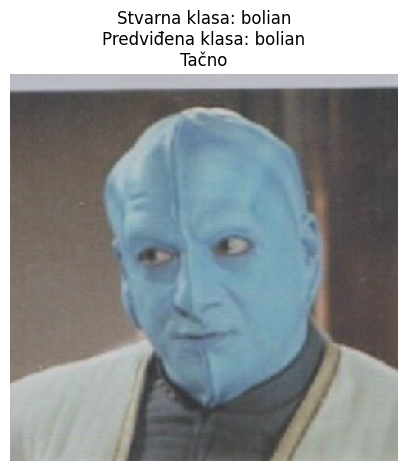

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


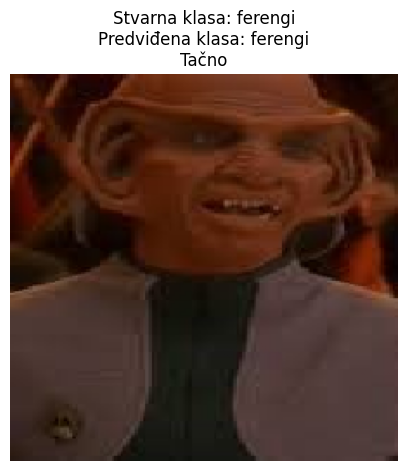

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


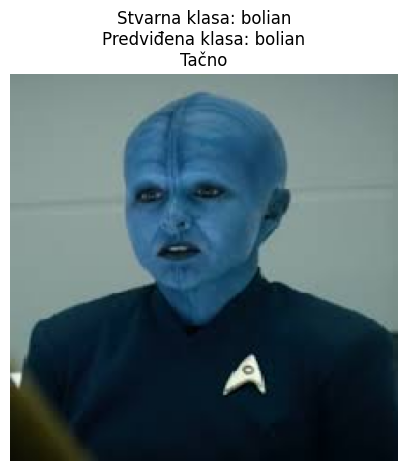

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


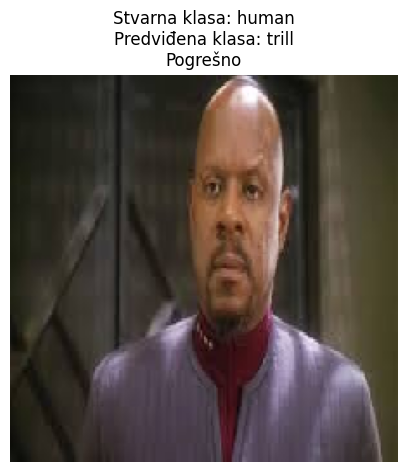

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


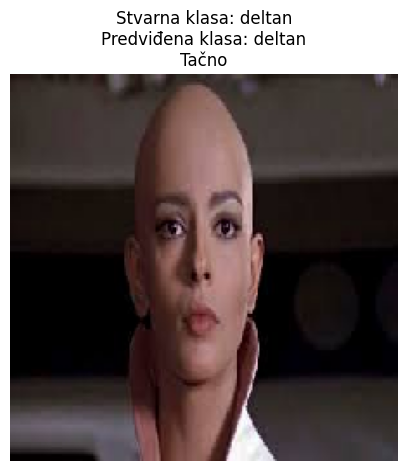

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


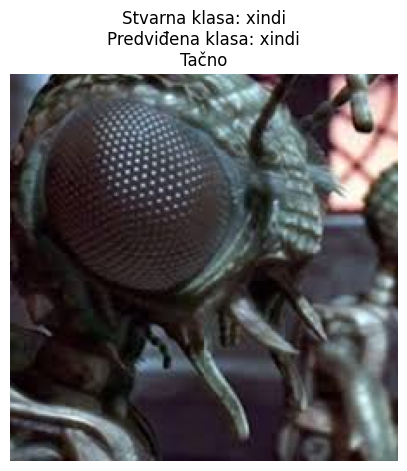

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


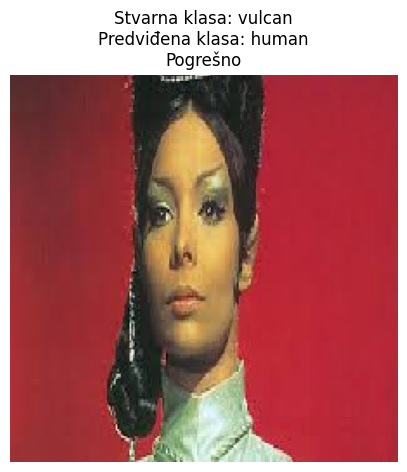

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


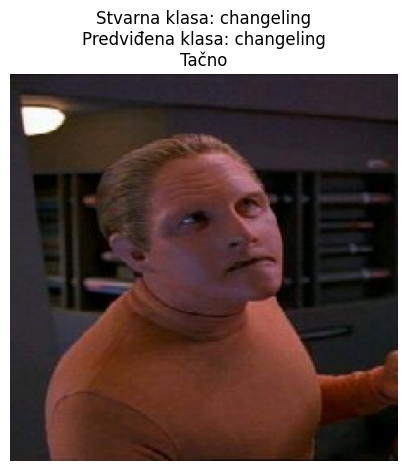

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


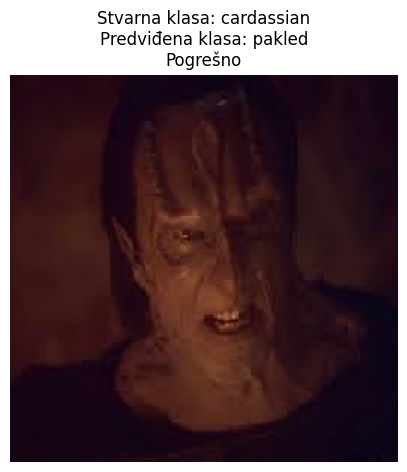

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


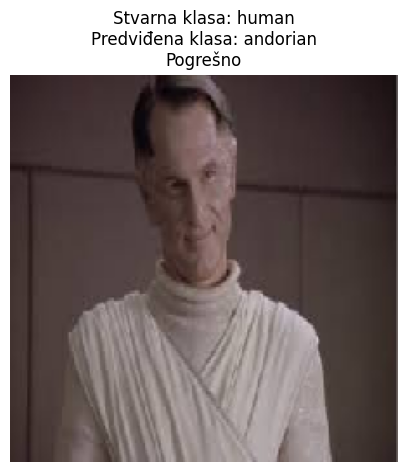

Procenat tačnosti: 60.00%


In [21]:
sortirani_nazivi_klasa = sorted(os.listdir(test_dir))

# Učitavanje test slika
test_slike = []
test_oznake = []

# Prolazak kroz test direktorijum i učitavanje slika
for idx, ime_klase in enumerate(sortirani_nazivi_klasa):
    putanja_klase = os.path.join(test_dir, ime_klase)
    for fajl in os.listdir(putanja_klase):
        putanja_slike = os.path.join(putanja_klase, fajl)
        slika = load_img(putanja_slike, target_size=(224, 224))  # Prilagođavanje veličine slike
        niz_slika = img_to_array(slika) / 255.0          # Normalizacija [0, 1]
        test_slike.append(niz_slika)
        test_oznake.append(idx)

# Konvertovanje u numpy nizove
test_slike = np.array(test_slike)
test_oznake = np.array(test_oznake)

# Nasumični izbor 10 slika za testiranje
indeksi = np.random.choice(range(len(test_slike)), 10, replace=False)

# Inicijalizacija evidencije za tačnost
tacne_predikcije = 0
ukupno_predikcija = 0

# Testiranje modela
for i in indeksi:
    img = test_slike[i]
    prava_oznaka = imena_klasa[test_oznake[i]]

    # Proširivanje dimenzije slike za predikciju
    img_niz = np.expand_dims(img, axis=0)
    predikcija = model.predict(img_niz)
    indeks_predvidjene_klase = np.argmax(predikcija)
    predvidjena_klasa = imena_klasa[indeks_predvidjene_klase]

    # Provera da li je predviđena klasa tačna
    tacno = prava_oznaka == predvidjena_klasa
    if tacno:
        tacne_predikcije += 1
    ukupno_predikcija += 1

    # Prikaz slike sa stvarnom i predviđenom klasom
    plt.figure(figsize=(5, 6))
    plt.imshow(img)
    plt.title(f"Stvarna klasa: {prava_oznaka}\nPredviđena klasa: {predvidjena_klasa}\n{'Tačno' if tacno else 'Pogrešno'}")
    plt.axis('off')
    plt.show()

# Izračunavanje tačnosti modela
preciznost_predikcije = (tacne_predikcije / ukupno_predikcija) * 100
print(f"Procenat tačnosti: {preciznost_predikcije:.2f}%")